In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import os
import numpy
from scipy import special
import fitsio
import gaia_tools.load
from galpy.util import bovy_plot, bovy_coords
%pylab inline
import seaborn as sns
save_figures= False
numpy.random.seed(1)

/Users/bovy/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))

Populating the interactive namespace from numpy and matplotlib


# An exploration of the *Gaia* selection function

## *TGAS* properties: color-color, color-magnitude

Let's look at some data relevant to the *Gaia* DR1 selection function, specifically that of the TGAS subset.

In [3]:
tgas= gaia_tools.load.tgas()
# Other data downloaded from Dustin Lang's http://portal.nersc.gov/project/cosmo/temp/dstn/gaia/
apass= fitsio.read(os.path.join(os.getenv('GAIA_TOOLS_DATA'),'Gaia','dstn_match','tgas-matched-apass-dr9.fits'))
bv= (apass['bmag']-apass['vmag'])
twomass= fitsio.read(os.path.join(os.getenv('GAIA_TOOLS_DATA'),'Gaia','dstn_match','tgas-matched-2mass.fits.gz'))
jk= twomass['j_mag']-twomass['k_mag']
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
print("%i TGAS stars, %i 2MASS matches (%i missing), %i APASS matches (%i missing)" \
          % (len(tgas),numpy.sum(twomass['matched']),len(tgas)-numpy.sum(twomass['matched']),
             numpy.sum((True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
                        *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)),
            len(tgas)-numpy.sum((True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
                        *(apass['vmag'] != 0.)*(apass['bmag'] != 0.))))

2057050 TGAS stars, 2052625 2MASS matches (4425 missing), 1737971 APASS matches (319079 missing)


A few color-color plots

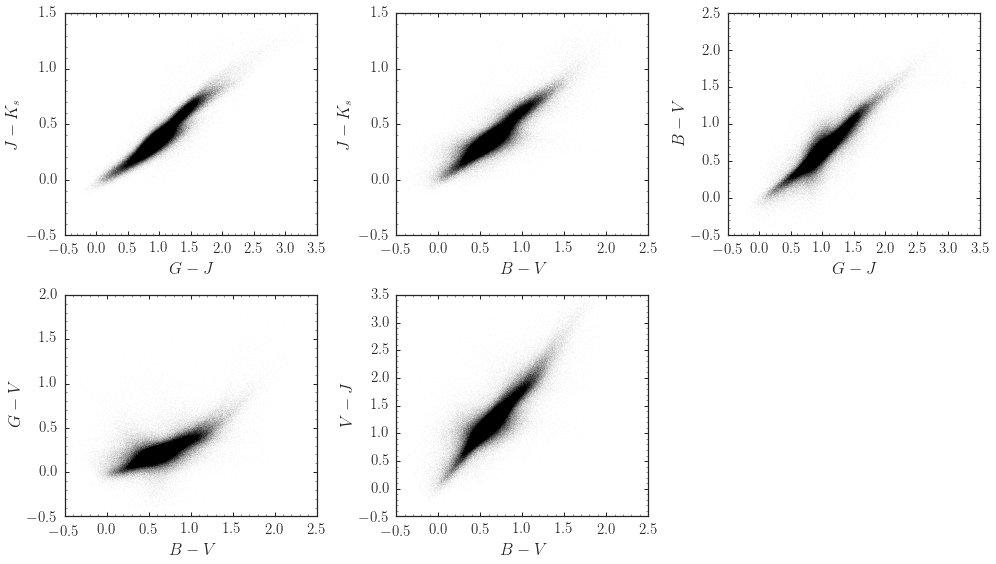

In [4]:
bovy_plot.bovy_print(axes_labelsize=17.,text_fontsize=12.,xtick_labelsize=15.,ytick_labelsize=15.)
figsize(14,8)
alpha=0.01
subplot(2,3,1)
bovy_plot.bovy_plot((tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],
                    (twomass['j_mag']-twomass['k_mag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-0.5,3.5],yrange=[-0.5,1.5],
                    xlabel=r'$G-J$',ylabel=r'$J-K_s$')
subplot(2,3,2)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],
                    (twomass['j_mag']-twomass['k_mag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-.5,2.5],yrange=[-0.5,1.5],
                    xlabel=r'$B-V$',ylabel=r'$J-K_s$')
subplot(2,3,3)
bovy_plot.bovy_plot((tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],
                    (apass['bmag']-apass['vmag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-0.5,3.5],yrange=[-0.5,2.5],
                    xlabel=r'$G-J$',ylabel=r'$B-V$')
subplot(2,3,4)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],
                    (apass['vmag']-tgas['phot_g_mean_mag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-0.5,2.5],yrange=[-0.5,2.],
                    xlabel=r'$B-V$',ylabel=r'$G-V$')
subplot(2,3,5)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],
                    (apass['vmag']-twomass['j_mag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-0.5,2.5],yrange=[-0.5,3.5],
                    xlabel=r'$B-V$',ylabel=r'$V-J$')
tight_layout()

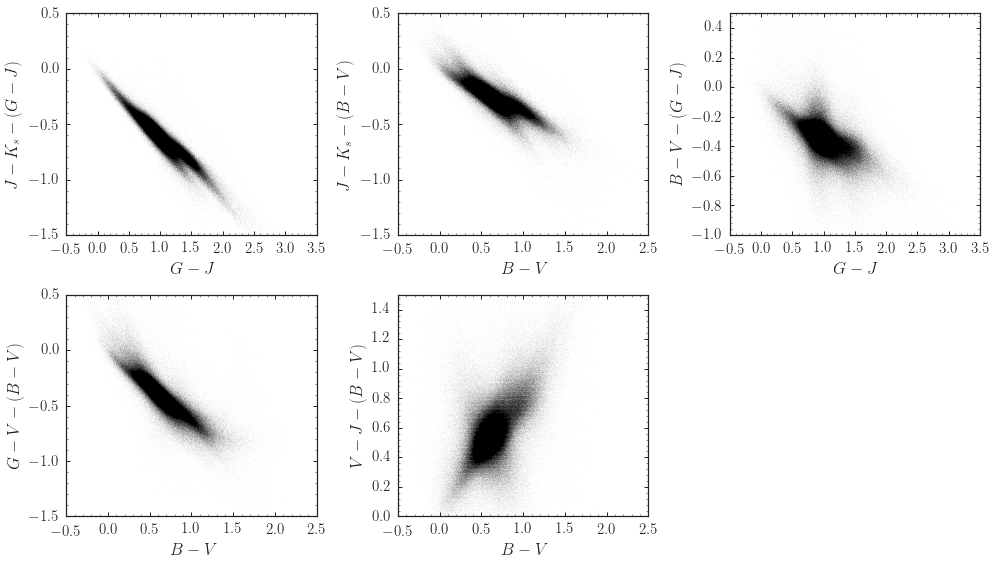

In [5]:
bovy_plot.bovy_print(axes_labelsize=17.,text_fontsize=12.,xtick_labelsize=15.,ytick_labelsize=15.)
figsize(14,8)
alpha=0.01
subplot(2,3,1)
bovy_plot.bovy_plot((tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],
                    (twomass['j_mag']-twomass['k_mag'])[matched]-(tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-0.5,3.5],yrange=[-1.5,0.5],
                    xlabel=r'$G-J$',ylabel=r'$J-K_s-(G-J)$')
subplot(2,3,2)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],
                    (twomass['j_mag']-twomass['k_mag'])[matched]-(apass['bmag']-apass['vmag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-.5,2.5],yrange=[-1.5,0.5],
                    xlabel=r'$B-V$',ylabel=r'$J-K_s-(B-V)$')
subplot(2,3,3)
bovy_plot.bovy_plot((tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],
                    (apass['bmag']-apass['vmag'])[matched]-(tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-0.5,3.5],yrange=[-1.,0.5],
                    xlabel=r'$G-J$',ylabel=r'$B-V-(G-J)$')
subplot(2,3,4)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],
                    (apass['vmag']-tgas['phot_g_mean_mag'])[matched]-(apass['bmag']-apass['vmag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-0.5,2.5],yrange=[-1.5,0.5],
                    xlabel=r'$B-V$',ylabel=r'$G-V-(B-V)$')
subplot(2,3,5)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],
                    (apass['vmag']-twomass['j_mag'])[matched]-(apass['bmag']-apass['vmag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-0.5,2.5],yrange=[0.,1.5],
                    xlabel=r'$B-V$',ylabel=r'$V-J-(B-V)$')
tight_layout()

A few color-magnitude plots

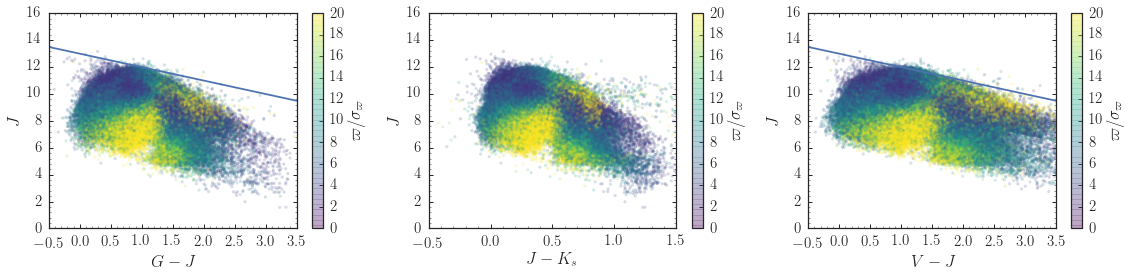

In [6]:
figsize(16,4)
subplot(1,3,1)
bovy_plot.bovy_plot((tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$G-J$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
gjs= numpy.linspace(-0.5,3.5,101)
plot(gjs,13.-gjs)
subplot(1,3,2)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
subplot(1,3,3)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
vjs= numpy.linspace(-0.5,3.5,101)
plot(vjs,13.-vjs)
tight_layout()

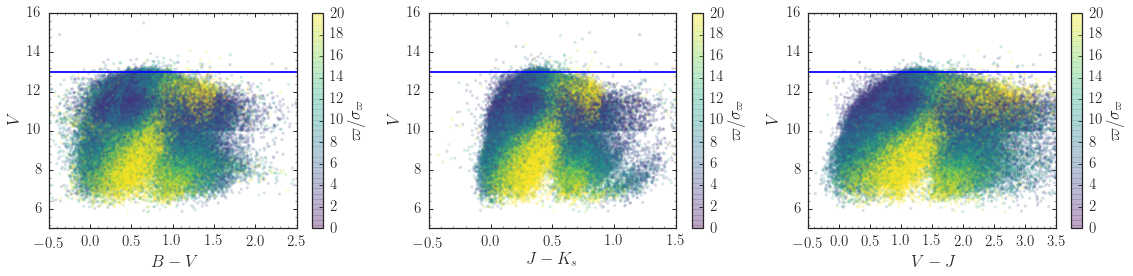

In [7]:
figsize(16,4)
subplot(1,3,1)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,2.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$B-V$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(1,3,2)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(1,3,3)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
tight_layout()

The selection function appears to be best behaved in $(B-V,V)$, but is relatively rectangular in the A and F star region in $(J-K_s,J)$, which is good news. Let's see what this looks like for relative-parallax-uncertainty cut of $10\,\%$:

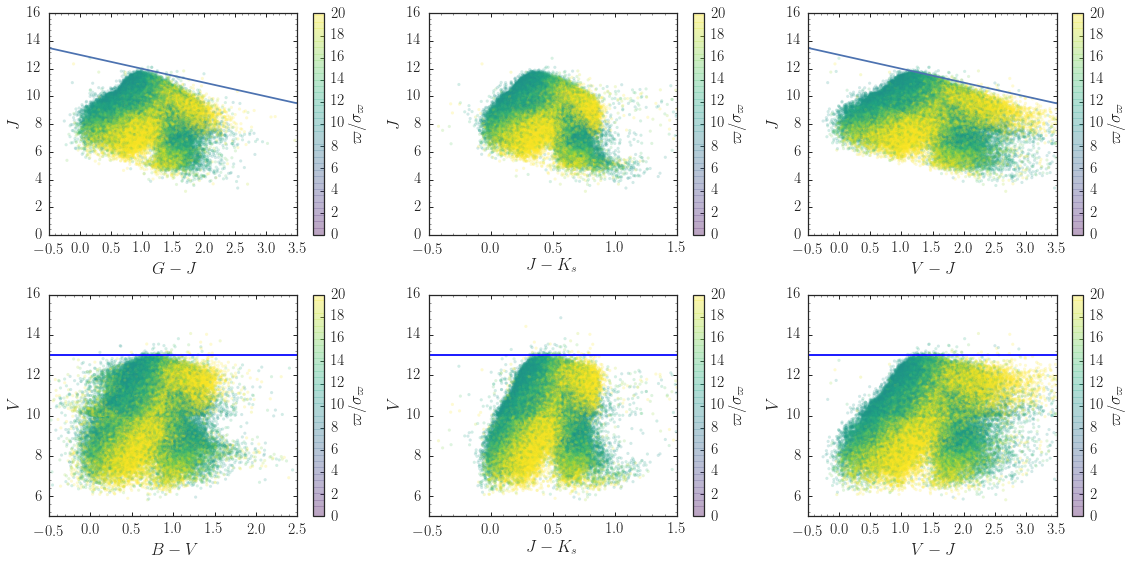

In [8]:
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 10.)
figsize(16,8)
subplot(2,3,1)
bovy_plot.bovy_plot((tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$G-J$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
gjs= numpy.linspace(-0.5,3.5,101)
plot(gjs,13.-gjs)
subplot(2,3,2)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
subplot(2,3,3)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
vjs= numpy.linspace(-0.5,3.5,101)
plot(vjs,13.-vjs)
subplot(2,3,4)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,2.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$B-V$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,5)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,6)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
tight_layout()

Now, a rather steep dependence on color is introduced, pivoting at $(J-K_s) \approx 0.3$. How about for a less restrictive cut?

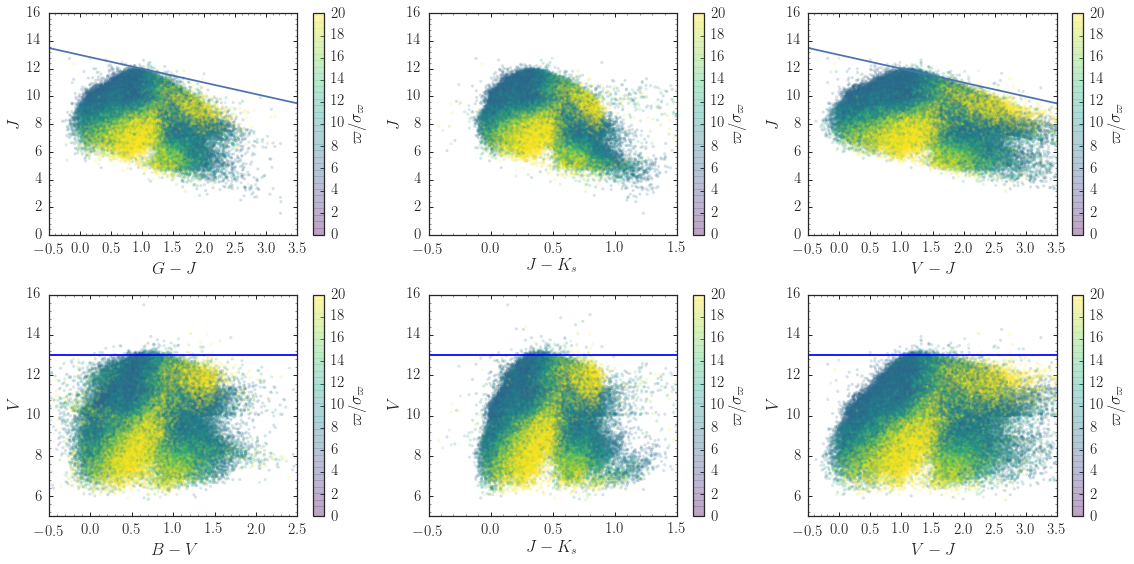

In [9]:
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 6.)
figsize(16,8)
subplot(2,3,1)
bovy_plot.bovy_plot((tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$G-J$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
gjs= numpy.linspace(-0.5,3.5,101)
plot(gjs,13.-gjs)
subplot(2,3,2)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
subplot(2,3,3)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
vjs= numpy.linspace(-0.5,3.5,101)
plot(vjs,13.-vjs)
subplot(2,3,4)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,2.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$B-V$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,5)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,6)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
tight_layout()

And an even more restrictive cut?

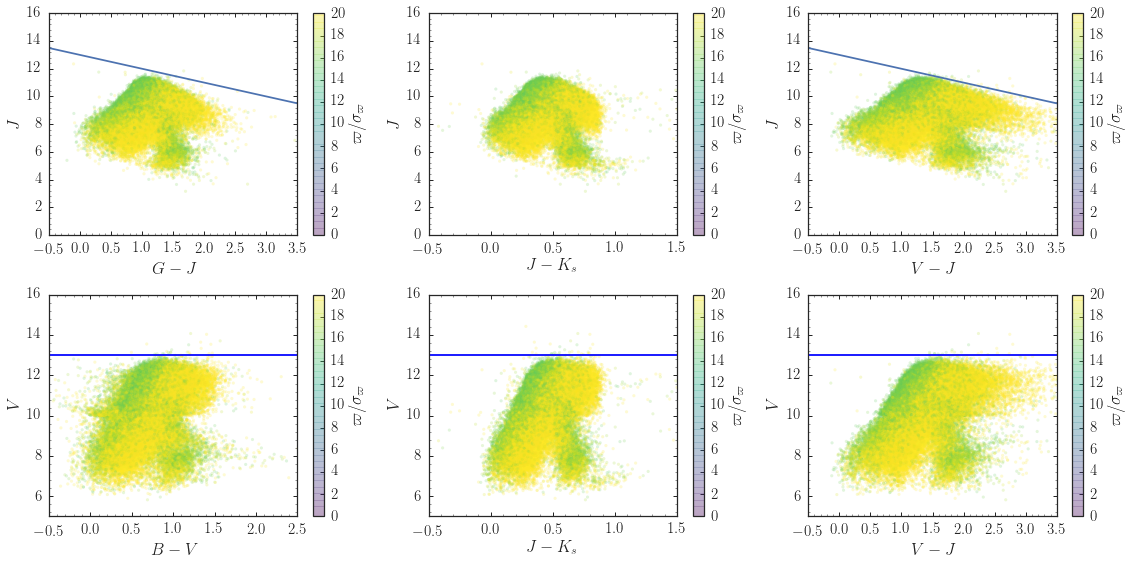

In [10]:
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 15.)
figsize(16,8)
subplot(2,3,1)
bovy_plot.bovy_plot((tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$G-J$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
gjs= numpy.linspace(-0.5,3.5,101)
plot(gjs,13.-gjs)
subplot(2,3,2)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
subplot(2,3,3)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
vjs= numpy.linspace(-0.5,3.5,101)
plot(vjs,13.-vjs)
subplot(2,3,4)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,2.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$B-V$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,5)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,6)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
tight_layout()

Maybe we should be looking in $G$

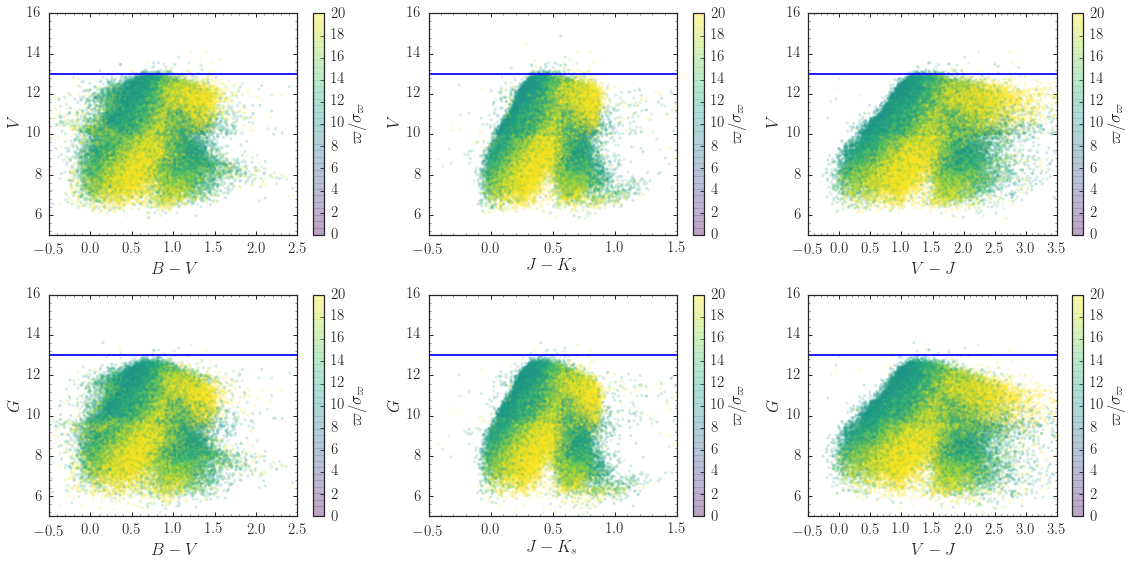

In [11]:
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 10.)
figsize(16,8)
subplot(2,3,1)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,2.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$B-V$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,2)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,3)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,4)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],tgas['phot_g_mean_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,2.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$B-V$',ylabel=r'$G$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,5)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],tgas['phot_g_mean_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$G$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,6)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],tgas['phot_g_mean_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$G$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
tight_layout()

$V$ works if anything a little better than $G$. Let's focus on the $(J-K_s,J)$ distribution and see whether we can delineate the border:

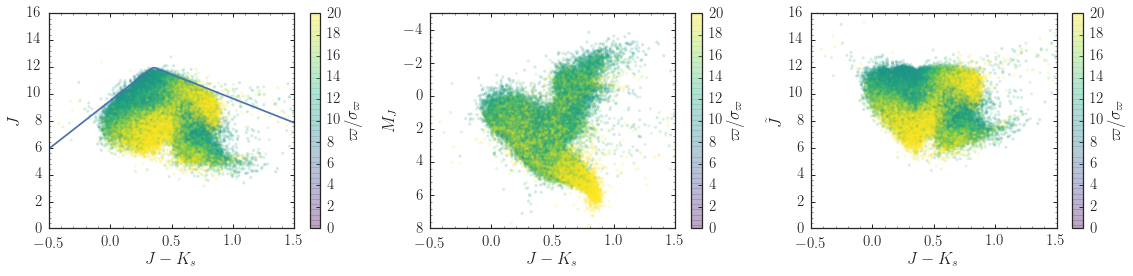

In [12]:
figsize(16,4)
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 10.)
subplot(1,3,1)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
jks= numpy.linspace(-0.5,1.5,101)
def jkbound(jk,jmax=12.):
    if isinstance(jk,float):
        jk= numpy.array([jk])
    out= numpy.empty_like(jk)
    pivot= 0.35
    out[jk < pivot]= 2.5/0.35*(jk[jk<pivot]-pivot)+jmax
    out[jk >= pivot]= -1.8/0.5*(jk[jk >= pivot]-pivot)+jmax
    return out
plot(jks,jkbound(jks))
dm= -5.*numpy.log10(tgas['parallax'])+10.
subplot(1,3,2)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched]-dm[matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[8.,-5.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$M_J$',clabel=r'$\varpi/\sigma_\varpi$')
subplot(1,3,3)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],
                    twomass['j_mag'][matched]+12.-jkbound((twomass['j_mag']-twomass['k_mag'])[matched]),
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$\tilde{J}$',clabel=r'$\varpi/\sigma_\varpi$')
tight_layout()

Here's the full NIR HR diagram for these stars:

A0-A9 = 5547, F0-5 = 19560, F5-9= 76420


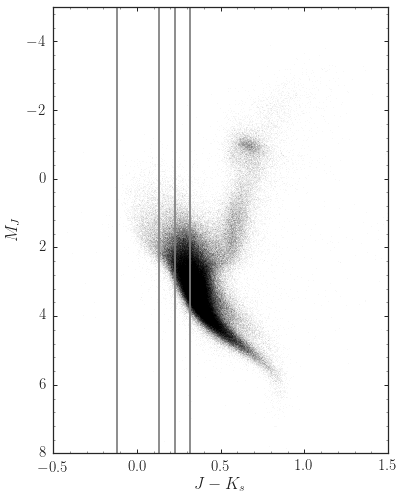

In [13]:
figsize(6,8)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched]-dm[matched],'k,',
                    xrange=[-0.5,1.5],yrange=[8.,-5.],alpha=0.03,
                    xlabel=r'$J-K_s$',ylabel=r'$M_J$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axvline(-0.12,color='0.5')
pyplot.axvline(0.13,color='0.5')
pyplot.axvline(0.23,color='0.5')
pyplot.axvline(0.315,color='0.5')
print("A0-A9 = %i, F0-5 = %i, F5-9= %i" % (\
      numpy.sum(matched*(jk > -0.12)*(jk < 0.13)),
      numpy.sum(matched*(jk > 0.13)*(jk < 0.23)),
      numpy.sum(matched*(jk > 0.23)*(jk < 0.315))))

Notice the offset main-sequence due to binaries. Below is the absolute magnitude distribution in a color slice in blue and the same distribution offset by a factor of two in brightness with a weight of 20% in green. The green distribution explains the second peak around $M_J=4.5$ (the red flips the blue histogram around the $M_J \approx5$ peak to show the effect of the uncertainties):

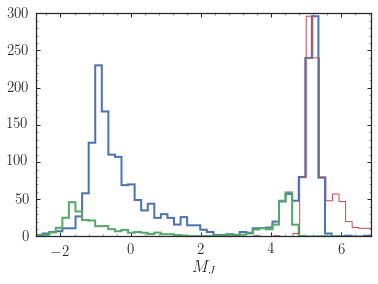

In [14]:
figsize(6,4)
jk= twomass['j_mag']-twomass['k_mag']
aindx= (jk > 0.7)*(jk < 0.725)
_= bovy_plot.bovy_hist((twomass['j_mag']-dm)[matched*aindx],bins=51,histtype='step',lw=2.,xlabel=r'$M_J$')
_= hist((-0.75+twomass['j_mag']-dm)[matched*aindx],bins=51,histtype='step',lw=2.,
        weights=0.2*numpy.ones(numpy.sum(matched*aindx)))
_= hist((10.35-twomass['j_mag']+dm)[matched*aindx],bins=51,histtype='step',lw=1.)

How does this perform on a more restrictive cut?

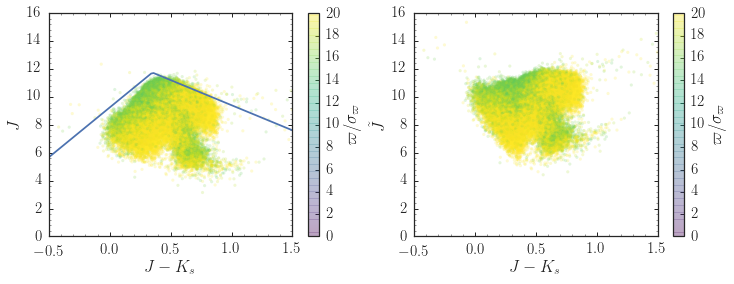

In [15]:
figsize(12,4)
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 15.)
subplot(1,2,1)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
jks= numpy.linspace(-0.5,1.5,101)
plot(jks,jkbound(jks,jmax=11.75))
subplot(1,2,2)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],
                    twomass['j_mag'][matched]+11.75-jkbound((twomass['j_mag']-twomass['k_mag'])[matched],jmax=11.75),
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$\tilde{J}$',clabel=r'$\varpi/\sigma_\varpi$')

## 2MASS counts

We can query the 2MASS database to get counts in 2MASS $(J-K_s,J)$ space, to get a sense of how severe the *TGAS* selection is. The following query gets these histograms in SQL:

In [16]:
# The following needs to be performed on the server with the 2MASS database, note that the " might get messed up
"""
import psycopg2
conn= psycopg2.connect("dbname=catalogs user=postgres")
cur= conn.cursor()
cur.execute("select floor(j_m*10), floor((j_m-k_m)*20), count(*) as count \
from twomass_psc \
where ((ph_qual like 'A__' OR (rd_flg like '1__' OR rd_flg like '3__')) \
AND (ph_qual like '__A' OR (rd_flg like '__1' OR rd_flg like '__3')) AND use_src='1' AND ext_key is null) \
group by floor(j_m*10),floor((j_m-k_m)*20) \
order by floor(j_m*10) ASC;")
import numpy
a= numpy.array(cur.fetchall(),dtype='float')
numpy.savetxt('2massc_jk_j.txt',a)
"""
a= numpy.loadtxt('2massc_jk_j.txt').T

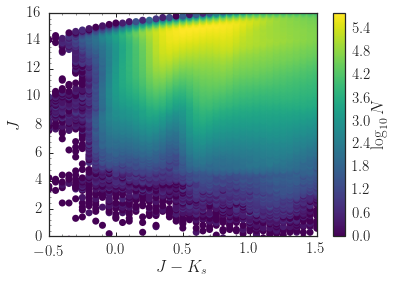

In [17]:
figsize(6,4)
bovy_plot.bovy_plot(a[1]/20.,a[0]/10.,c=numpy.log10(a[2]),
                    scatter=True,s=50.,edgecolors='None',
                    cmap='viridis',colorbar=True,clabel=r'$\log_{10}N$',
                    xrange=[-0.5,1.5],yrange=[0.,16.],
                    xlabel=r'$J-K_s$',ylabel=r'$J$')

Note how the completeness limit around $K_s = 14.3$ is hit at the blue end. Same with the TGAS $\varpi/\sigma_\varpi > 10$ sample overlaid:

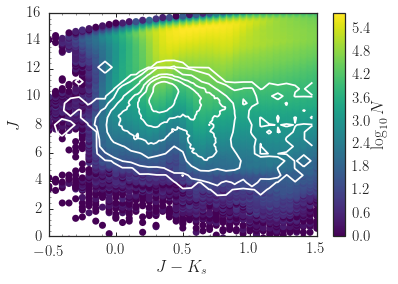

In [18]:
bovy_plot.bovy_plot(a[1]/20.,a[0]/10.,c=numpy.log10(a[2]),
                    scatter=True,s=50.,edgecolors='None',
                    cmap='viridis',colorbar=True,clabel=r'$\log_{10}N$',
                    xrange=[-0.5,1.5],yrange=[0.,16.],
                    xlabel=r'$J-K_s$',ylabel=r'$J$')
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 10.)
matched*= (True-numpy.isnan(twomass['j_mag']))*(True-numpy.isnan(twomass['k_mag']))
# Two different kinds of binnings
levels= list(special.erf(numpy.arange(1,4)/numpy.sqrt(4.)))
levels.append(1.01)
levels= numpy.array(levels)
bovy_plot.scatterplot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched],
                      overplot=True,xrange=[-0.5,1.5],yrange=[0.,16.],
                      justcontours=True,cntrcolors='w',levels=levels,bins=101)
levels= list(special.erf(numpy.arange(4,7)/numpy.sqrt(4.)))
levels.append(1.01)
levels= numpy.array(levels)
bovy_plot.scatterplot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched],
                      overplot=True,xrange=[-0.5,1.5],yrange=[0.,16.],
                      justcontours=True,cntrcolors='w',levels=levels,bins=31)

How does this look in the transformed color system?

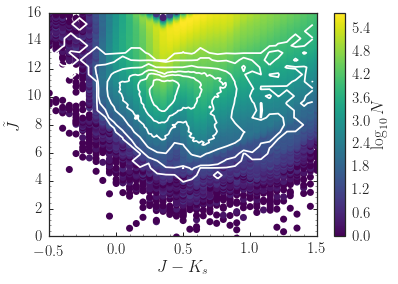

In [19]:
bovy_plot.bovy_plot(a[1]/20.,a[0]/10.+12.-jkbound(a[1]/20.),
                    c=numpy.log10(a[2]),
                    scatter=True,s=50.,edgecolors='None',
                    cmap='viridis',colorbar=True,clabel=r'$\log_{10}N$',
                    xrange=[-0.5,1.5],yrange=[0.,16.],
                    xlabel=r'$J-K_s$',ylabel=r'$\tilde{J}$')
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 10.)
matched*= (True-numpy.isnan(twomass['j_mag']))*(True-numpy.isnan(twomass['k_mag']))
# Two different kinds of binnings
levels= list(special.erf(numpy.arange(1,4)/numpy.sqrt(4.)))
levels.append(1.01)
levels= numpy.array(levels)
bovy_plot.scatterplot((twomass['j_mag']-twomass['k_mag'])[matched],
                      twomass['j_mag'][matched]+12.-jkbound((twomass['j_mag']-twomass['k_mag'])[matched]),
                      overplot=True,xrange=[-0.5,1.5],yrange=[0.,16.],
                      justcontours=True,cntrcolors='w',levels=levels,bins=101)
levels= list(special.erf(numpy.arange(4,7)/numpy.sqrt(4.)))
levels.append(1.01)
levels= numpy.array(levels)
bovy_plot.scatterplot((twomass['j_mag']-twomass['k_mag'])[matched],
                      twomass['j_mag'][matched]+12.-jkbound((twomass['j_mag']-twomass['k_mag'])[matched]),
                      overplot=True,xrange=[-0.5,1.5],yrange=[0.,16.],
                      justcontours=True,cntrcolors='w',levels=levels,bins=31)

This distribution does seem to indicate that the selection function for the $\varpi / \sigma_\varpi > 10$ sample is roughly independent of color in $\tilde{J}$, with simply a sharp cut in $\tilde{J}$. The histogram in $J$ is

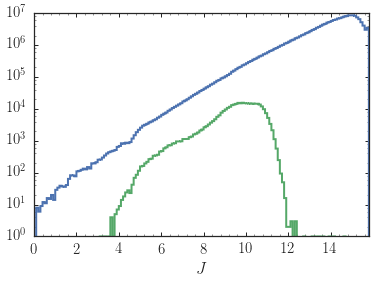

In [20]:
_= bovy_plot.bovy_hist(a[0][True-numpy.isnan(a[0])]/10.,weights=a[2][True-numpy.isnan(a[0])],
                       histtype='step',lw=2.,
                       range=[0.,15.8],bins=158,
                       xlabel=r'$J$')
pyplot.gca().set_yscale('log')
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *twomass['matched']\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
#            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 10.)
matched*= (True-numpy.isnan(twomass['j_mag']))*(True-numpy.isnan(twomass['k_mag']))
_= bovy_plot.bovy_hist(twomass['j_mag'][matched],range=[0.,15.8],bins=158,overplot=True,lw=2.,histtype='step')

and that in $\tilde{J}$:

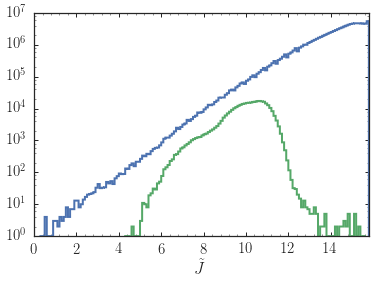

In [21]:
_= bovy_plot.bovy_hist((a[0]/10.+12.-jkbound(a[1]/20.)),weights=a[2],
                       histtype='step',lw=2.,
                       range=[0.,15.8],bins=158,
                       xlabel=r'$\tilde{J}$')
pyplot.gca().set_yscale('log')
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
#            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 10.)
matched*= (True-numpy.isnan(twomass['j_mag']))*(True-numpy.isnan(twomass['k_mag']))
_= bovy_plot.bovy_hist(twomass['j_mag'][matched]+12.-jkbound((twomass['j_mag']-twomass['k_mag'])[matched]),
                       range=[0.,15.8],bins=158,overplot=True,lw=2.,histtype='step')

The ratios are:

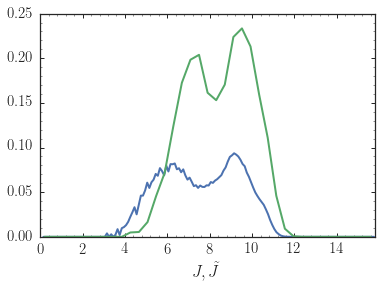

In [22]:
# J
h2,e2= numpy.histogram(a[0][True-numpy.isnan(a[0])]/10.,
                       weights=a[2][True-numpy.isnan(a[0])],
                       range=[0.,15.8],bins=158)
ht, et= numpy.histogram(twomass['j_mag'][matched],range=[0.,15.8],bins=158)
js= 0.5*(numpy.roll(e2,-1)+e2)[:-1]
bovy_plot.bovy_plot(js,ht/h2,
                   xrange=[0.,15.8],yrange=[0.,0.25],lw=2.,
                   xlabel=r'$J, \tilde{J}$')
h2,e2= numpy.histogram((a[0]/10.+12.-jkbound(a[1]/20.)),weights=a[2],
                          range=[0.,15.8],bins=158//4)
ht, et= numpy.histogram(twomass['j_mag'][matched]+12.-jkbound((twomass['j_mag']-twomass['k_mag'])[matched]),
                        range=[0.,15.8],bins=158//4)
js= 0.5*(numpy.roll(e2,-1)+e2)[:-1]
bovy_plot.bovy_plot(js,ht/h2,overplot=True,
                   xrange=[0.,15.8],yrange=[0.,0.25],lw=2.)

The ratio in different color bins for $J$ again shows that the selection function has a strong color dependence in $J$:

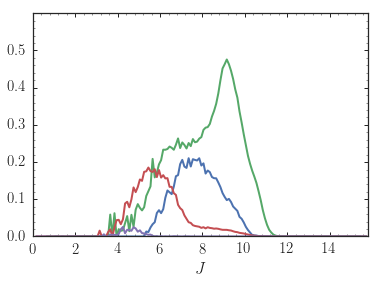

In [23]:
# J
jkmins= [-0.2,0.2,0.6,1.]
jkmaxs= [0.2,0.6,1.,1.4]
overplot= False
for jkmi, jkma in zip(jkmins,jkmaxs):
    taindx= (True-numpy.isnan(a[0]))*(a[1]/20. >= jkmi)*(a[1]/20. < jkma)
    h2,e2= numpy.histogram(a[0][taindx]/10.,weights=a[2][taindx],
                           range=[0.,15.8],bins=158)
    ttindx= matched*(jk >= jkmi)*(jk < jkma)
    ht, et= numpy.histogram(twomass['j_mag'][ttindx],range=[0.,15.8],bins=158)
    js= 0.5*(numpy.roll(e2,-1)+e2)[:-1]
    bovy_plot.bovy_plot(js,ht/h2,
                   xrange=[0.,15.8],yrange=[0.,0.6],lw=2.,overplot=overplot,
                       xlabel=r'$J$')
    overplot= True

The selection function in $\tilde{J}$, however, also has a strong color dependence, so going to $\tilde{J}$ doesn't seem to work very well.

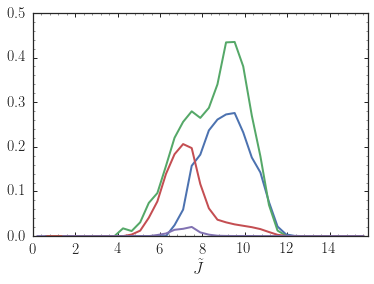

In [24]:
# Jtilde
jkmins= [-0.2,0.2,0.6,1.]
jkmaxs= [0.2,0.6,1.,1.4]
overplot= False
for jkmi, jkma in zip(jkmins,jkmaxs):
    taindx= (a[1]/20. >= jkmi)*(a[1]/20. < jkma)
    h2,e2= numpy.histogram((a[0]/10.+12.-jkbound(a[1]/20.))[taindx],weights=a[2][taindx],
                           range=[0.,15.8],bins=158//4)
    ttindx= matched*(jk >= jkmi)*(jk < jkma)
    ht, et= numpy.histogram(twomass['j_mag'][ttindx]+12.-jkbound((twomass['j_mag']-twomass['k_mag'])[ttindx]),
                            range=[0.,15.8],bins=158//4)
    js= 0.5*(numpy.roll(e2,-1)+e2)[:-1]
    bovy_plot.bovy_plot(js,ht/h2,
                   xrange=[0.,15.8],yrange=[0.,0.5],lw=2.,overplot=overplot,
                       xlabel=r'$\tilde{J}$')
    overplot= True

In color-bins for A and F stars:

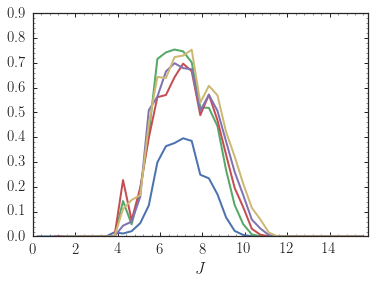

In [25]:
# J
figsize(6,4)
jkmins= [-0.13,0.12,0.18,0.23,0.275]
jkmaxs= [0.12,0.18,0.23,0.275,0.315]
matched= twomass['matched']*(tgas['parallax']/tgas['parallax_error'] > 10.)
overplot= False
for jkmi, jkma in zip(jkmins,jkmaxs):
    taindx= (True-numpy.isnan(a[0]))*(a[1]/20. >= jkmi)*(a[1]/20. < jkma)
    h2,e2= numpy.histogram(a[0][taindx]/10.,weights=a[2][taindx],
                           range=[0.,15.8],bins=158//4)
    ttindx= matched*(jk >= jkmi)*(jk < jkma)
    ht, et= numpy.histogram(twomass['j_mag'][ttindx],range=[0.,15.8],bins=158//4)
    js= 0.5*(numpy.roll(e2,-1)+e2)[:-1]
    bovy_plot.bovy_plot(js,ht/h2,
                   xrange=[0.,15.8],yrange=[0.,0.9],lw=2.,overplot=overplot,
                       xlabel=r'$J$')
    overplot= True

The selection functions of the F stars (four non-blue curves) appear to be very similar, except that the upper cut off has a slight color dependence. Let's try to correct for this with a linear color term:

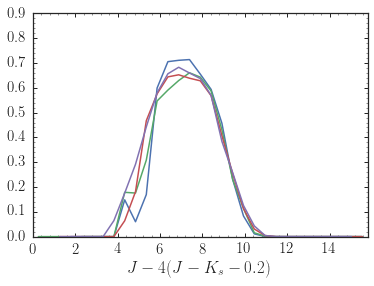

In [26]:
# J
figsize(6,4)
jkmins= [0.12,0.18,0.23,0.275]
jkmaxs= [0.18,0.23,0.275,0.315]
matched= twomass['matched']*(tgas['parallax']/tgas['parallax_error'] > 10.)
overplot= False
jkslope= 4.
for jkmi, jkma in zip(jkmins,jkmaxs):
    taindx= (True-numpy.isnan(a[0]))*(a[1]/20. >= jkmi)*(a[1]/20. < jkma)
    h2,e2= numpy.histogram((a[0]/10.-(a[1]/20-0.2)*jkslope)[taindx],weights=a[2][taindx],
                           range=[0.,15.8],bins=158//5)
    ttindx= matched*(jk >= jkmi)*(jk < jkma)
    ht, et= numpy.histogram((twomass['j_mag']-(jk-0.2)*jkslope)[ttindx],range=[0.,15.8],bins=158//5)
    js= 0.5*(numpy.roll(e2,-1)+e2)[:-1]
    bovy_plot.bovy_plot(js,ht/h2,
                   xrange=[0.,15.8],yrange=[0.,0.9],lw=1.5,overplot=overplot,
                       xlabel=r'$J-4(J-K_s-0.2)$')
    overplot= True

This appears to work well at the fainter end, but the bright tail now has a slight color dependence.

How about without any parallax uncertainty cut or demanding APASS photometry?

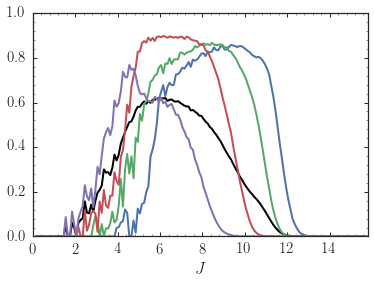

In [27]:
# J
#matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
#            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
#            *twomass['matched']
matched= twomass['matched']
# Full sample
h2,e2= numpy.histogram(a[0][True-numpy.isnan(a[0])]/10.,
                       weights=a[2][True-numpy.isnan(a[0])],
                       range=[0.,15.8],bins=158)
ht, et= numpy.histogram(twomass['j_mag'][matched],range=[0.,15.8],bins=158)
js= 0.5*(numpy.roll(e2,-1)+e2)[:-1]
bovy_plot.bovy_plot(js,ht/h2,'k',
                   xrange=[0.,15.8],yrange=[0.,1.],lw=2.,
                   xlabel=r'$J$')
jkmins= [-0.2,0.2,0.6,1.]
jkmaxs= [0.2,0.6,1.,1.4]
overplot= True
for jkmi, jkma in zip(jkmins,jkmaxs):
    taindx= (True-numpy.isnan(a[0]))*(a[1]/20. >= jkmi)*(a[1]/20. < jkma)
    h2,e2= numpy.histogram(a[0][taindx]/10.,weights=a[2][taindx],
                           range=[0.,15.8],bins=158)
    ttindx= matched*(jk >= jkmi)*(jk < jkma)
    ht, et= numpy.histogram(twomass['j_mag'][ttindx],range=[0.,15.8],bins=158)
    js= 0.5*(numpy.roll(e2,-1)+e2)[:-1]
    bovy_plot.bovy_plot(js,ht/h2,
                   xrange=[0.,15.8],yrange=[0.,1.],lw=2.,overplot=overplot,
                       xlabel=r'$J$')
    overplot= True

The following are the fields in the *TGAS* and *2MASS* catalogs

In [28]:
tgas.dtype.fields

<dictproxy {'astrometric_delta_q': (dtype('>f4'), 192),
 'astrometric_excess_noise': (dtype('>f8'), 196),
 'astrometric_excess_noise_sig': (dtype('>f8'), 204),
 'astrometric_n_bad_obs_ac': (dtype('>i4'), 188),
 'astrometric_n_bad_obs_al': (dtype('>i4'), 184),
 'astrometric_n_good_obs_ac': (dtype('>i4'), 180),
 'astrometric_n_good_obs_al': (dtype('>i4'), 176),
 'astrometric_n_obs_ac': (dtype('>i4'), 172),
 'astrometric_n_obs_al': (dtype('>i4'), 168),
 'astrometric_primary_flag': (dtype('bool'), 212),
 'astrometric_priors_used': (dtype('>i4'), 225),
 'astrometric_relegation_factor': (dtype('>f4'), 213),
 'astrometric_weight_ac': (dtype('>f4'), 221),
 'astrometric_weight_al': (dtype('>f4'), 217),
 'b': (dtype('>f8'), 313),
 'dec': (dtype('>f8'), 64),
 'dec_error': (dtype('>f8'), 72),
 'dec_parallax_corr': (dtype('>f4'), 144),
 'dec_pmdec_corr': (dtype('>f4'), 152),
 'dec_pmra_corr': (dtype('>f4'), 148),
 'duplicated_source': (dtype('bool'), 231),
 'ecl_lat': (dtype('>f8'), 329),
 'ecl_lon

In [29]:
twomass.dtype.fields

<dictproxy {'association': (dtype('S1'), 115),
 'b_m_opt': (dtype('>f4'), 95),
 'coadd': (dtype('>i2'), 120),
 'coadd_key': (dtype('>i4'), 116),
 'date_day': (dtype('uint8'), 60),
 'date_month': (dtype('uint8'), 59),
 'date_year': (dtype('>i2'), 57),
 'dec': (dtype('>f8'), 8),
 'designation': (dtype('S17'), 29),
 'dist_edge_ew': (dtype('>f4'), 107),
 'dist_edge_ns': (dtype('>f4'), 103),
 'dist_flag_ew': (dtype('bool'), 112),
 'dist_flag_ns': (dtype('bool'), 111),
 'dist_opt': (dtype('>f4'), 91),
 'dup_src': (dtype('uint8'), 113),
 'err_angle': (dtype('uint8'), 28),
 'err_major': (dtype('>f4'), 20),
 'err_minor': (dtype('>f4'), 24),
 'galaxy_contam': (dtype('uint8'), 47),
 'glat': (dtype('>f4'), 82),
 'glon': (dtype('>f4'), 78),
 'h_blend': (dtype('uint8'), 190),
 'h_cc': (dtype('S1'), 191),
 'h_cmsig': (dtype('>f4'), 168),
 'h_m_stdap': (dtype('>f4'), 176),
 'h_mag': (dtype('>f4'), 164),
 'h_msig_stdap': (dtype('>f4'), 180),
 'h_msigcom': (dtype('>f4'), 172),
 'h_ndet_m': (dtype('uint8